In [1]:
import pandas as pd
import scanpy as sc
import numpy as np
import pickle as pkl
import seaborn as sns
import os
import statsmodels.api as sm
from scipy import stats
import networkx as nx

from lik_models import *
from helper_funcs import *
from plotting_funcs import *
from mcmc_data import *

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import cm

import warnings
warnings.filterwarnings('ignore')

In [3]:
mcmc = mcmc_data(count_matrix_fn='data/e13_5_mouse_forebrain_neuron_diff.2.raw_count_matrix.tsv',
                          pkl_dir='outputs/e13_5_forebrain_dorsal_2/',
                          tfs_fn='data/mouse_transcription_factors_zhou_et_al.txt',
                          name='e13.5 Mouse Cortical Neuron')

#load in all pkls
mcmc.load_pkls(sub_tfs=False)

#get best fitting genes
mcmc.get_top_genes(n_top=50,sub_tf=False)

Loading Count Matrix...
Normalizing Count Matrix...
Loading pkls...


In [4]:
gene_map = {}
gene_map_r = {}
for gene in mcmc.counts_dict:
    gene_map[gene.split("|")[1]] = gene
    gene_map_r[gene] = gene.split("|")[1]

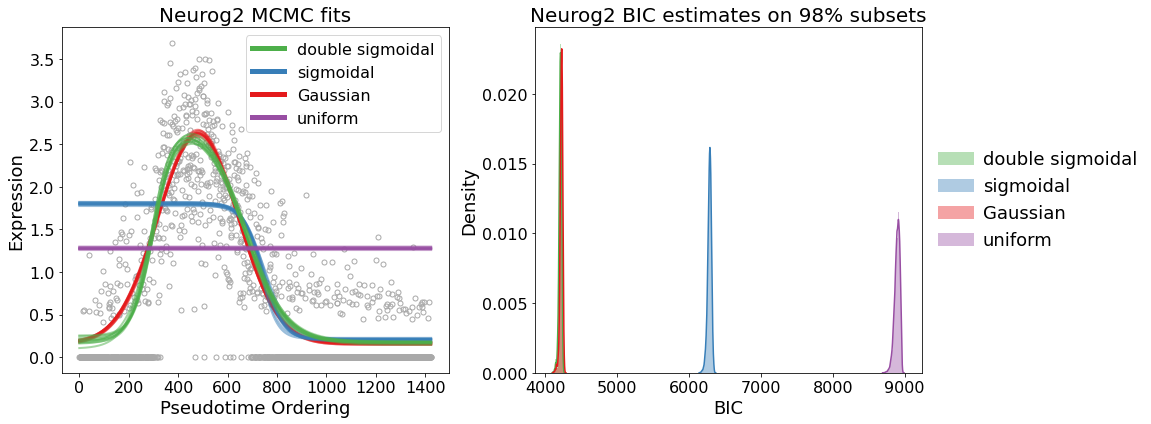

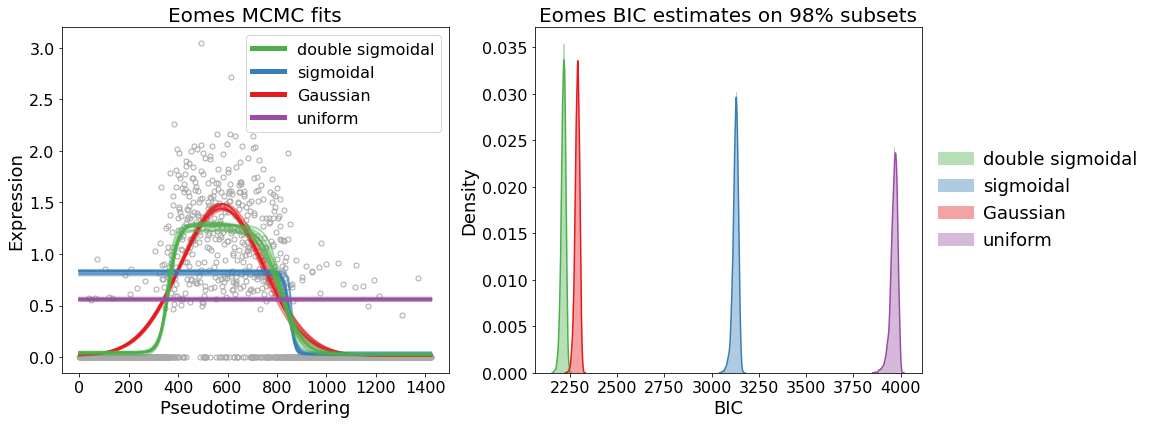

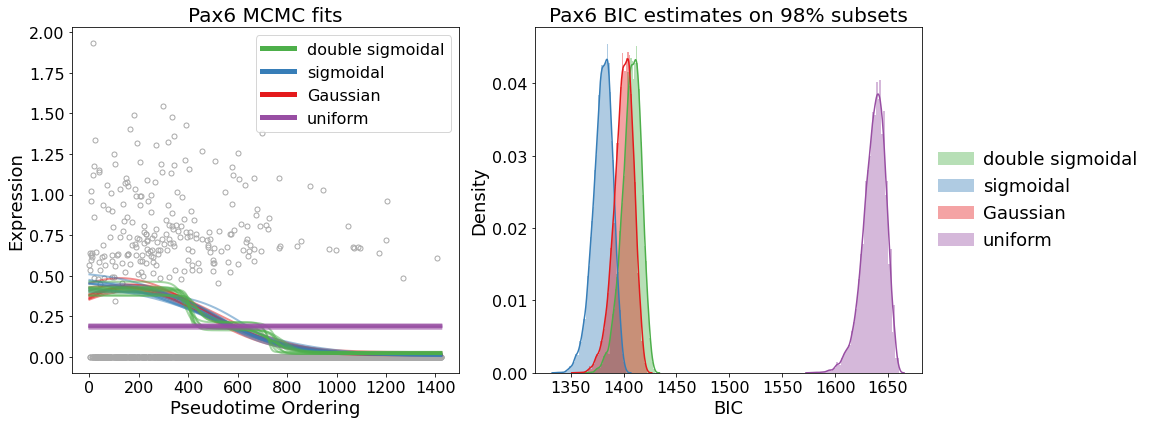

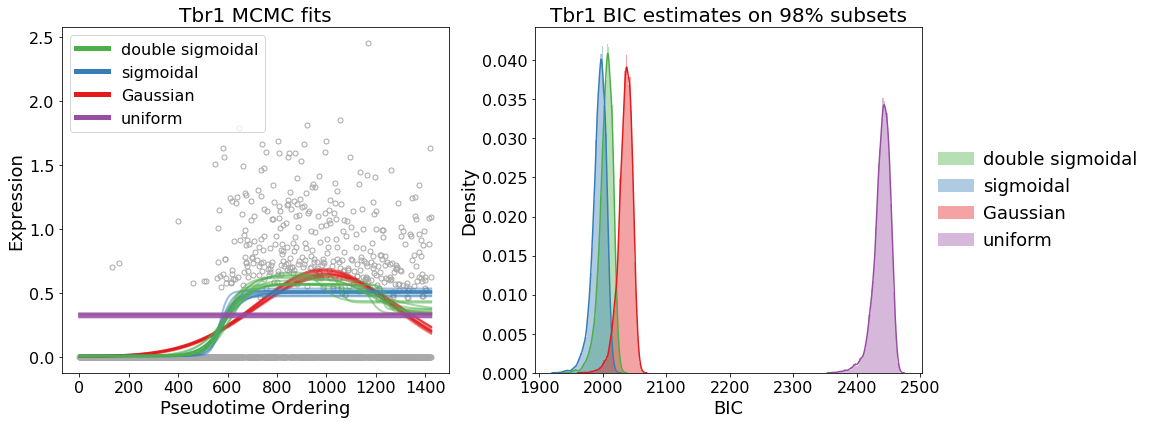

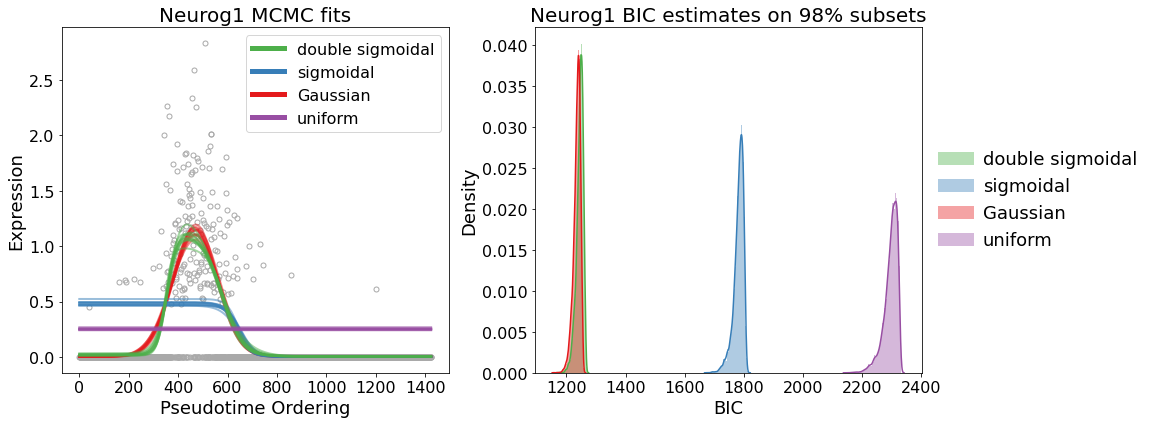

In [9]:
for gene_iter in ['Neurog2','Eomes','Pax6','Tbr1','Neurog1']:
    fig = make_joint_fit_and_bic_estimate_plot(mcmc,gene_map[gene_iter],gene_lab=gene_iter)
    plt.show()

0 5
1 5
2 5
3 5
4 5


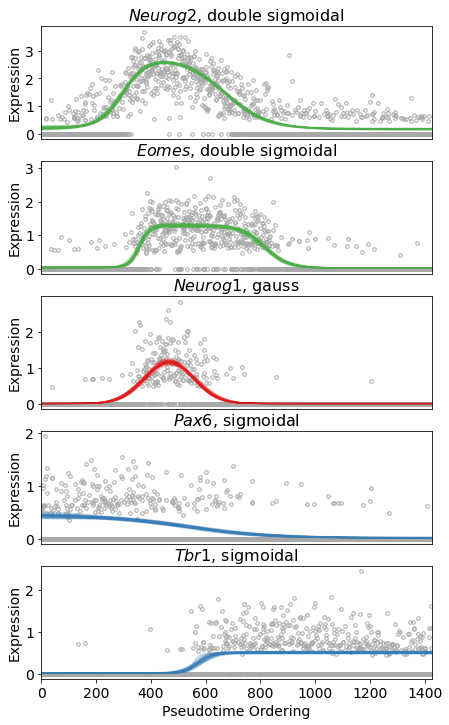

In [10]:
gene_list = ['Neurog2','Eomes','Neurog1','Pax6','Tbr1']
fig = make_inflec_point_comp_plot_2(mcmc,[gene_map[gene] for gene in gene_list],
                                    gene_list_title=[r'$\it{'+gene+'}$' for gene in gene_list],
                                    figsize=(7,12))#,ylim=[-0.1,3.1])

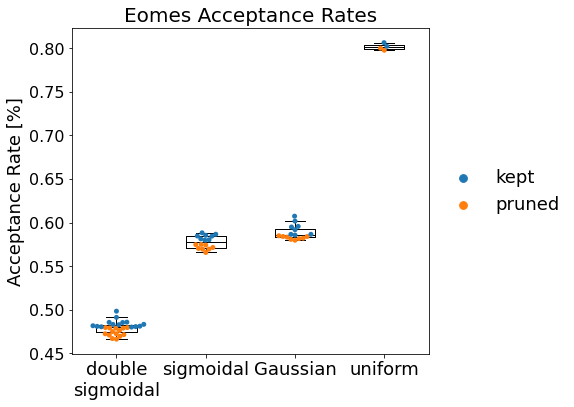

In [23]:
gene = 'Eomes'
fig = make_acceptance_fraction_plot(mcmc,gene_map[gene],gene_lab=gene)

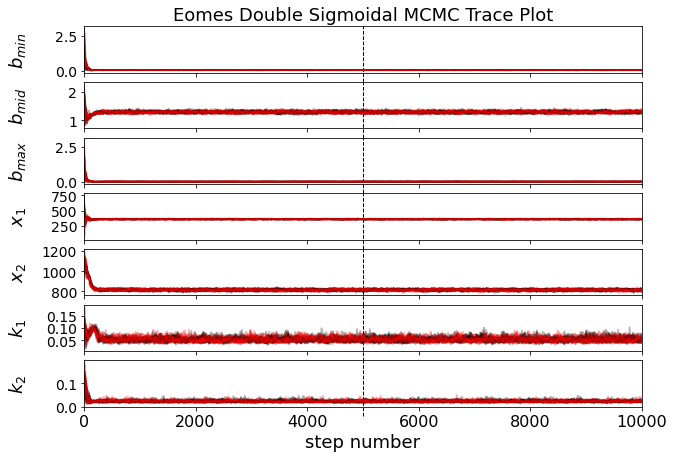

In [24]:
fig = make_mcmc_trace_plot(mcmc,gene_map[gene],mcmc.best_fits[gene_map[gene]],sub_in_red=True,gene_lab=gene)

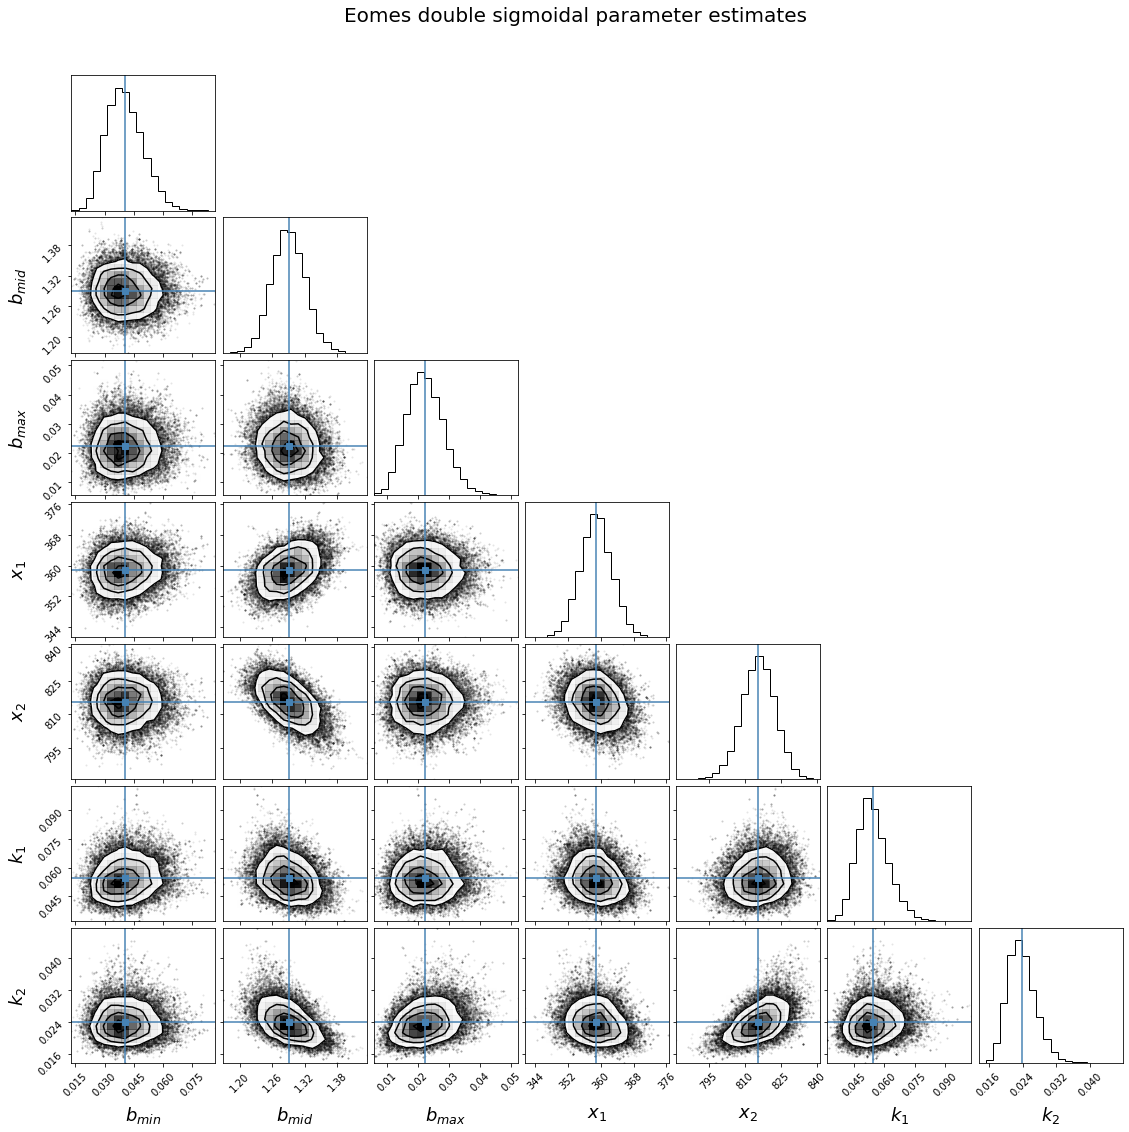

In [27]:
fig = make_corner_plot(mcmc,gene_map[gene],mcmc.best_fits[gene_map[gene]],gene_lab=gene,n_discard=5000,use_max_args=True)
plt.show()

(-5.0, 1.0)

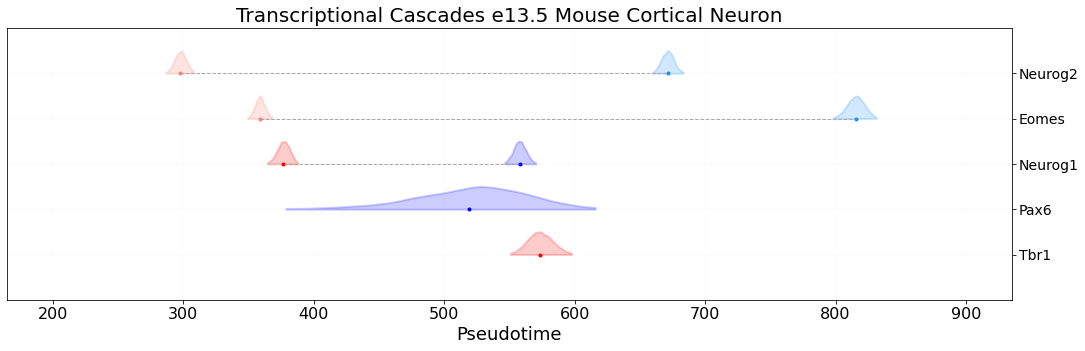

In [28]:
fig = plot_transcriptional_cascade(mcmc,title=None, figsize=(18,5), tfs=mcmc.genes_good_fit)
ax = plt.gca()
plt.ylim(-len(mcmc.genes_good_fit),1)

In [29]:
autocorrelations = {}
iter_ = 0
for j,pkl_fn in enumerate(os.listdir(mcmc.pkl_dir)):
    if 'autocorrelation' not in pkl_fn: continue
    iter_ += 1
    gene = pkl_fn.split(".auto")[0]
    if iter_%100 == 0: print(iter_, gene)
    autocorrelations[gene] = pkl.load(open(mcmc.pkl_dir+pkl_fn,'rb'))

In [30]:
autocorrelations[gene].keys()

dict_keys(['acf_params_tot', 'auto_corr_length_int', 'autocorr_time_estimates'])

In [34]:
gene = 'Eomes'

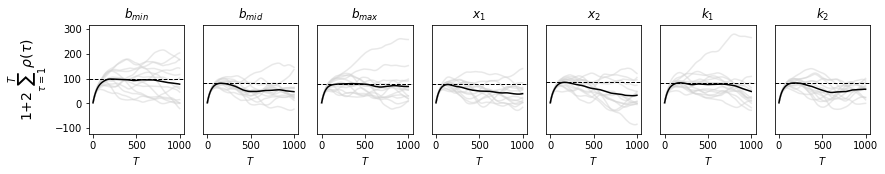

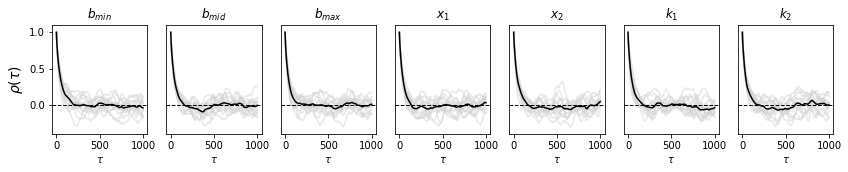

In [35]:
fig = plot_autocorr_time_esimates(mcmc,gene_map[gene],autocorrelations)
plt.show()
fig = plot_autocorrelation_func(mcmc,gene_map[gene],autocorrelations)
plt.show()